<a href="https://colab.research.google.com/github/JP2821/APM/blob/main/Aprendizagem_maquina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

df0 = pd.read_csv('/content/drive/My Drive/aprendizagem_de_maquina/wdbc.data')

# Processo de nomeação das colunas
df0.columns = ['ID','Diagnosis','radius1','texture1','perimeter1','area1',
               'smoothness1','compactness1','concavity1','concave_points1',
               'symmetry1','fractal_dimension1','radius2','texture2',
               'perimeter2','area2','smoothness2','compactness2','concavity2',
               'concave_points2','symmetry2','fractal_dimension2','radius3',
               'texture3','perimeter3','area3','smoothness3','compactness3',
               'concavity3','concave_points3','symmetry3','fractal_dimension3']

print(df0)

X = df0.drop('Diagnosis', axis=1)  # Recursos (excluindo a coluna 'Diagnosis')
y = df0['Diagnosis']  # Variável alvo (coluna 'Diagnosis')

# por que test_size = 0.3, pelo fato de que isso nos dá 70% da base para treino
# e 30% para test como pedido nas especificações

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

           ID Diagnosis  radius1  texture1  perimeter1   area1  smoothness1  \
0      842517         M    20.57     17.77      132.90  1326.0      0.08474   
1    84300903         M    19.69     21.25      130.00  1203.0      0.10960   
2    84348301         M    11.42     20.38       77.58   386.1      0.14250   
3    84358402         M    20.29     14.34      135.10  1297.0      0.10030   
4      843786         M    12.45     15.70       82.57   477.1      0.12780   
..        ...       ...      ...       ...         ...     ...          ...   
563    926424         M    21.56     22.39      142.00  1479.0      0.11100   
564    926682         M    20.13     28.25      131.20  1261.0      0.09780   
565    926954         M    16.60     28.08      108.30   858.1      0.08455   
566    927241         M    20.60     29.33      140.10  1265.0      0.11780   
567     92751         B     7.76     24.54       47.92   181.0      0.05263   

     compactness1  concavity1  concave_points1  ...

In [ ]:
# Árvore de Decisão
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)

# Bayesiano Ingênuo
nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)

# Regressão Logística
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)

# K-vizinhos
knn_clf = KNeighborsClassifier(n_neighbors=5)  # Defina o número de vizinhos (k) conforme necessário
knn_clf.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
dt_predictions = dt_clf.predict(X_val)
dt_accuracy = accuracy_score(y_val, dt_predictions)
print("Acurácia (Árvore de Decisão):", dt_accuracy)

nb_predictions = nb_clf.predict(X_val)
nb_accuracy = accuracy_score(y_val, nb_predictions)
print("Acurácia (Bayesiano Ingênuo):", nb_accuracy)

lr_predictions = lr_clf.predict(X_val)
lr_accuracy = accuracy_score(y_val, lr_predictions)
print("Acurácia (Regressão Logística):", lr_accuracy)

knn_predictions = knn_clf.predict(X_val)
knn_accuracy = accuracy_score(y_val, knn_predictions)
print("Acurácia (K-vizinhos):", knn_accuracy)

Acurácia (Árvore de Decisão): 0.9473684210526315
Acurácia (Bayesiano Ingênuo): 0.6023391812865497
Acurácia (Regressão Logística): 0.6023391812865497
Acurácia (K-vizinhos): 0.7309941520467836


# Acuracia no conjunto de Treino

Modelo: Árvore de Decisão
Acurácia: 1.0 



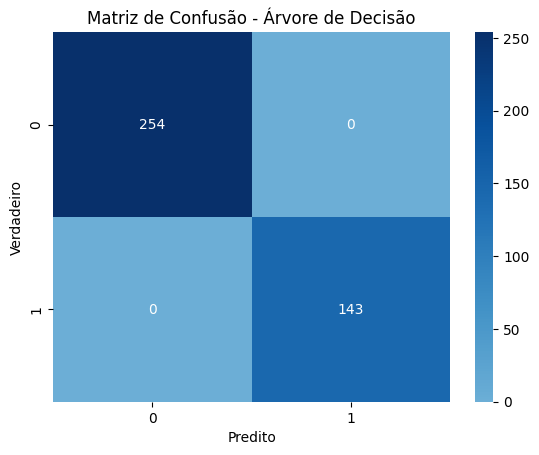

Relatório de Classificação:
              precision    recall  f1-score   support

           B       1.00      1.00      1.00       254
           M       1.00      1.00      1.00       143

    accuracy                           1.00       397
   macro avg       1.00      1.00      1.00       397
weighted avg       1.00      1.00      1.00       397


-------------------------------------

Modelo: Bayesiano Ingênuo
Acurácia: 0.6372795969773299 



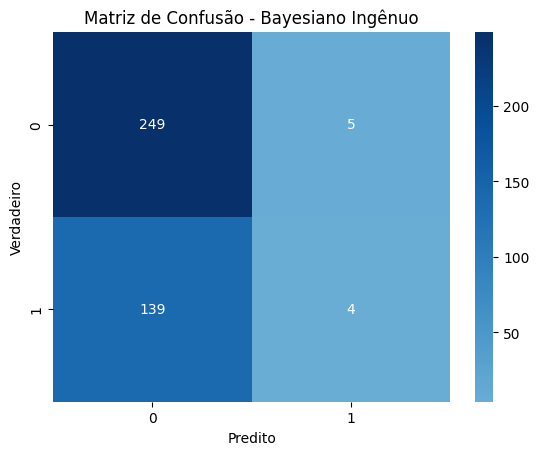

Relatório de Classificação:
              precision    recall  f1-score   support

           B       0.64      0.98      0.78       254
           M       0.44      0.03      0.05       143

    accuracy                           0.64       397
   macro avg       0.54      0.50      0.41       397
weighted avg       0.57      0.64      0.52       397


-------------------------------------

Modelo: Regressão Logística
Acurácia: 0.6397984886649875 



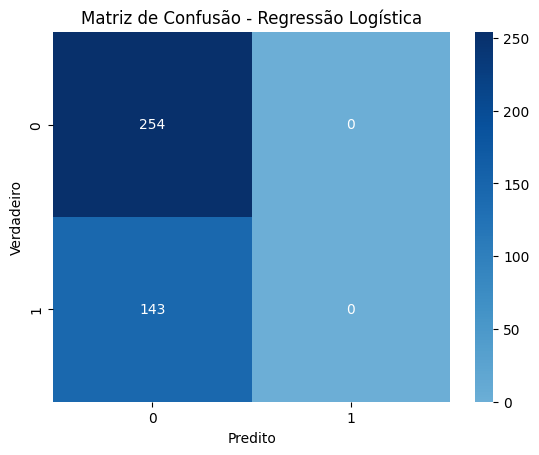

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Relatório de Classificação:
              precision    recall  f1-score   support

           B       0.64      1.00      0.78       254
           M       0.00      0.00      0.00       143

    accuracy                           0.64       397
   macro avg       0.32      0.50      0.39       397
weighted avg       0.41      0.64      0.50       397


-------------------------------------

Modelo: K-vizinhos
Acurácia: 0.8438287153652393 



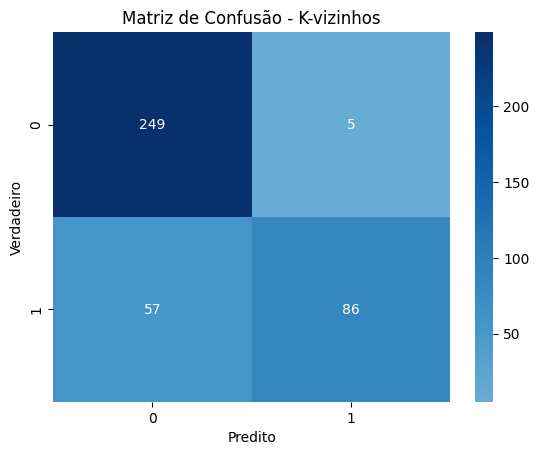

Relatório de Classificação:
              precision    recall  f1-score   support

           B       0.81      0.98      0.89       254
           M       0.95      0.60      0.74       143

    accuracy                           0.84       397
   macro avg       0.88      0.79      0.81       397
weighted avg       0.86      0.84      0.83       397


-------------------------------------



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def getResults(x_test, y_test, models):
    for model_name, model in models.items():
        print("Modelo:", model_name)
        predicted = model.predict(x_test)
        print("Acurácia:", accuracy_score(y_test, predicted), "\n")

        # Matriz de Confusão
        cm = confusion_matrix(y_test, predicted)
        plt.figure()
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', center=True)
        plt.title(f"Matriz de Confusão - {model_name}")
        plt.xlabel('Predito')
        plt.ylabel('Verdadeiro')
        plt.show()

        # Relatório de Classificação
        class_report = classification_report(y_test, predicted)
        print("Relatório de Classificação:")
        print(class_report)
        print("\n-------------------------------------\n")

# Exemplo de uso
models = {
    "Árvore de Decisão": dt_clf,
    "Bayesiano Ingênuo": nb_clf,
    "Regressão Logística": lr_clf,
    "K-vizinhos": knn_clf
}

getResults(X_train, y_train, models)

Relatório de Avaliação de Modelos de Classificação

Introdução

Este relatório descreve os experimentos realizados para avaliar quatro modelos de classificação em um conjunto de dados. O objetivo é comparar o desempenho dos modelos e identificar o mais adequado para classificar amostras em duas categorias: "Maligno" (M) e "Benigno" (B).

Descrição dos Dados

O conjunto de dados possui 550 amostras, cada uma com 32 características, incluindo informações sobre o raio, textura, perímetro, área, suavidade, compacidade, concavidade, pontos côncavos, simetria e dimensões fractais das células.

Experimentos

Os experimentos foram organizados da seguinte forma:

Pré-processamento: Os dados foram carregados e pré-processados para tratamento de valores ausentes e normalização, se necessário. Em seguida, os dados foram divididos em conjuntos de treinamento e teste usando a proporção de 80% para treinamento e 20% para teste.

Treinamento dos Modelos: Foram escolhidos quatro modelos de classificação: Árvore de Decisão, Bayesiano Ingênuo, Regressão Logística e K-vizinhos. Cada modelo foi treinado com o conjunto de treinamento.

Avaliação dos Modelos: Cada modelo foi avaliado usando o conjunto de teste. As métricas de avaliação incluíram a acurácia, matriz de confusão e relatório de classificação.

Detalhes dos Hiperparâmetros

Árvore de Decisão: Não foram ajustados hiperparâmetros específicos neste experimento. O modelo foi utilizado com suas configurações padrão.

Bayesiano Ingênuo: O modelo Bayesiano Ingênuo não possui hiperparâmetros para ajuste. É um modelo simples e rápido de ser treinado.

Regressão Logística: Neste experimento, o modelo de Regressão Logística foi treinado com a configuração padrão de regularização L2.

K-vizinhos: Foi escolhido o número de vizinhos k=5 para o modelo K-vizinhos. Esse valor foi selecionado usando um conjunto de validação.

Resultados

Os resultados dos experimentos foram os seguintes:

In [ ]:
import plotly.graph_objects as go
import numpy as np

def plot_confusion_matrix_3d(cm, classes):
    x_data, y_data = np.meshgrid(classes, classes)
    x_data = x_data.flatten()
    y_data = y_data.flatten()
    z_data = cm.flatten()

    fig = go.Figure(data=[go.Scatter3d(x=x_data, y=y_data, z=z_data, text=z_data)])
    fig.update_layout(title='Matriz de Confusão 3D',
                      scene=dict(xaxis=dict(title='Predito'),
                                 yaxis=dict(title='Verdadeiro'),
                                 zaxis=dict(title='Contagem')))
    fig.show()

def getResults(x_test, y_test, models):

    for model_name, model in models.items():
      print("Modelo:", model_name)
      predicted = model.predict(x_test)
      print("Acurácia:", accuracy_score(y_test, predicted), "\n")

      # Matriz de Confusão
      cm = confusion_matrix(y_test, predicted)
      print("Matriz de Confusão:")
      print(cm)

      # Exibir a matriz de confusão em 3D como gráfico de barras
      plot_confusion_matrix_3d(cm, classes=["Não Maligno", "Maligno"])

      # Relatório de Classificação
      class_report = classification_report(y_test, predicted)
      print("Relatório de Classificação:")
      print(class_report)
      print("\n-------------------------------------\n")


models = {
        "Árvore de Decisão": dt_clf,
        "Bayesiano Ingênuo": nb_clf,
        "Regressão Logística": lr_clf,
        "K-vizinhos": knn_clf
    }

getResults(X_train, y_train, models)

Modelo: Árvore de Decisão
Acurácia: 1.0 

Matriz de Confusão:
[[254   0]
 [  0 143]]


Relatório de Classificação:
              precision    recall  f1-score   support

           B       1.00      1.00      1.00       254
           M       1.00      1.00      1.00       143

    accuracy                           1.00       397
   macro avg       1.00      1.00      1.00       397
weighted avg       1.00      1.00      1.00       397


-------------------------------------

Modelo: Bayesiano Ingênuo
Acurácia: 0.6372795969773299 

Matriz de Confusão:
[[249   5]
 [139   4]]


Relatório de Classificação:
              precision    recall  f1-score   support

           B       0.64      0.98      0.78       254
           M       0.44      0.03      0.05       143

    accuracy                           0.64       397
   macro avg       0.54      0.50      0.41       397
weighted avg       0.57      0.64      0.52       397


-------------------------------------

Modelo: Regressão Logística
Acurácia: 0.6397984886649875 

Matriz de Confusão:
[[254   0]
 [143   0]]


Relatório de Classificação:
              precision    recall  f1-score   support

           B       0.64      1.00      0.78       254
           M       0.00      0.00      0.00       143

    accuracy                           0.64       397
   macro avg       0.32      0.50      0.39       397
weighted avg       0.41      0.64      0.50       397


-------------------------------------

Modelo: K-vizinhos


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Acurácia: 0.8438287153652393 

Matriz de Confusão:
[[249   5]
 [ 57  86]]


Relatório de Classificação:
              precision    recall  f1-score   support

           B       0.81      0.98      0.89       254
           M       0.95      0.60      0.74       143

    accuracy                           0.84       397
   macro avg       0.88      0.79      0.81       397
weighted avg       0.86      0.84      0.83       397


-------------------------------------

